In [1]:
import os

import numpy as np
import pandas as pd
s1 = pd.Series(['a', 'b', 'c'])
s1

0    a
1    b
2    c
dtype: object

In [2]:
a = pd.DataFrame(np.arange(1, 11).reshape(2, 5))
a

,0,1,2,3,4
0,1,2,3,4,5
1,6,7,8,9,10


In [3]:
a = pd.DataFrame()
a['app'] = ['a', 'b', 'c']
a['date'] = [1, 3, 5]
a['score'] = [2, 4, 6]
s1 = pd.Series([11, 22, 33, 44], name='ddd')
print(s1)
s1.drop(index=1, inplace=True)
print(s1)
s2 = pd.Series([111, 222, 333, 444], index=[2, 3, 4, 5])
a['new_col_1'] = s1
a['c2'] = s2
a1 = pd.concat([s1, s2], join='outer', axis=1)
a1.columns = ['c1', 'c2']
a1 = pd.concat([a1, pd.Series([1, 0.2, np.nan, 2])], axis=1, join='inner')
a1

0    11
1    22
2    33
3    44
Name: ddd, dtype: int64
0    11
2    33
3    44
Name: ddd, dtype: int64


,c1,c2,0
0,11.0,NaN,1.0
2,33.0,111.0,NaN
3,44.0,222.0,2.0


In [6]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
a = pd.DataFrame([[11, np.nan, 13, 14], [21, 22, np.nan, 24], [31, 32, 33, 34]], columns=['c1', 'c2', 'c3', 'c4'])
transformer = ColumnTransformer([
    ("const_imputer", SimpleImputer(strategy="constant", fill_value=0), ['c1', 'c3']),
    ("mean_imputer", SimpleImputer(), ['c2', 'c4'])
])
transformer.fit_transform(a)


array([[11., 13., 27., 14.],
       [21.,  0., 22., 24.],
       [31., 33., 32., 34.]])

In [7]:
b = a.set_index('app')
b

,date,score
app,,
a,1,2
b,3,4
c,5,6


In [8]:
print(b.index.values)
c = b.loc['a']
c['date'], c['score']

['a' 'b' 'c']


(1, 2)

In [9]:
a[0:1]

,app,date,score
0,a,1,2


In [10]:
data = pd.DataFrame(np.arange(1, 10).reshape(3, 3), index=['r1', 'r2', 'r3'], columns=['c1', 'c2', 'c3'])
data

,c1,c2,c3
r1,1,2,3
r2,4,5,6
r3,7,8,9


In [11]:
data['c1']

r1    1
r2    4
r3    7
Name: c1, dtype: int64

In [12]:
data[['c1', 'c3']]

,c1,c3
r1,1,3
r2,4,6
r3,7,9


In [13]:
data[1:3]

,c1,c2,c3
r2,4,5,6
r3,7,8,9


In [14]:
data.iloc[1:2]

,c1,c2,c3
r2,4,5,6


In [15]:
data.iloc[0]

c1    1
c2    2
c3    3
Name: r1, dtype: int64

In [16]:
data.loc['r2']

c1    4
c2    5
c3    6
Name: r2, dtype: int64

In [17]:
data.loc[['r2']]

,c1,c2,c3
r2,4,5,6


In [18]:
data.loc[['r2', 'r3']]

,c1,c2,c3
r2,4,5,6
r3,7,8,9


In [19]:
data.head(2)

,c1,c2,c3
r1,1,2,3
r2,4,5,6


In [20]:
data[0:2][['c1', 'c3']]

,c1,c3
r1,1,3
r2,4,6


In [21]:
data[['c3', 'c1']][0:2]

,c3,c1
r1,3,1
r2,6,4


In [22]:
b = data[0:2][['c3', 'c2']]
print(type(b))
b

<class 'pandas.core.frame.DataFrame'>


,c3,c2
r1,3,2
r2,6,5


In [23]:
data[0:2]

,c1,c2,c3
r1,1,2,3
r2,4,5,6


In [24]:
data['c1']

r1    1
r2    4
r3    7
Name: c1, dtype: int64

In [25]:
data[['c1', 'c3']]

,c1,c3
r1,1,3
r2,4,6
r3,7,9


In [26]:
b = data.iloc[0:2]
print(type(b))
b

<class 'pandas.core.frame.DataFrame'>


,c1,c2,c3
r1,1,2,3
r2,4,5,6


In [27]:
c = b['c1']
print(type(c))
c

<class 'pandas.core.series.Series'>


r1    1
r2    4
Name: c1, dtype: int64

In [28]:
c = b[['c1']]
print(type(c))
c

<class 'pandas.core.frame.DataFrame'>


,c1
r1,1
r2,4


In [29]:
d = data['c3'][0]
print(type(d))
d

<class 'numpy.int64'>


3

In [30]:
d = data.iloc[0]
print(type(d))
d
print(type(d['c3']))
d[['c3', 'c1']]

<class 'pandas.core.series.Series'>
<class 'numpy.int64'>


c3    3
c1    1
Name: r1, dtype: int64

In [31]:
d = data.loc[['r1'], ['c1']]
d, d.values, type(d)

(    c1
 r1   1,
 array([[1]]),
 pandas.core.frame.DataFrame)

In [32]:
data.iloc[[0, 2], [0, 1, 2]]

,c1,c2,c3
r1,1,2,3
r3,7,8,9


In [33]:
b = data.loc['r1', 'c1']
type(b), b

(numpy.int64, 1)

In [34]:
b = data.loc['r1', ['c1', 'c2']]
type(b), b

(pandas.core.series.Series,
 c1    1
 c2    2
 Name: r1, dtype: int64)

In [35]:
b = data.loc[['r1', 'r2'], 'c1']
b, type(b)

(r1    1
 r2    4
 Name: c1, dtype: int64,
 pandas.core.series.Series)

In [36]:
data.iloc[1, 2]

6

In [37]:
data.iloc[0:2, 1]

r1    2
r2    5
Name: c2, dtype: int64

In [38]:
data.iloc[0:2, [1, 2]]

,c2,c3
r1,2,3
r2,5,6


In [39]:
data.iloc[[0, 1], [1, 2]]

,c2,c3
r1,2,3
r2,5,6


In [40]:
b = data['c1'] > 1
b, type(b)

(r1    False
 r2     True
 r3     True
 Name: c1, dtype: bool,
 pandas.core.series.Series)

In [41]:
data[data['c1'] > 1]

,c1,c2,c3
r2,4,5,6
r3,7,8,9


In [42]:
data[(data['c1'] > 1) & (data['c2'] < 8)]

,c1,c2,c3
r2,4,5,6


In [43]:
data.shape

(3, 3)

In [44]:
data.values, type(data), type(data.values)

(array([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]),
 pandas.core.frame.DataFrame,
 numpy.ndarray)

In [45]:
data.describe()

,c1,c2,c3
count,3.0,3.0,3.0
mean,4.0,5.0,6.0
std,3.0,3.0,3.0
min,1.0,2.0,3.0
25%,2.5,3.5,4.5
50%,4.0,5.0,6.0
75%,5.5,6.5,7.5
max,7.0,8.0,9.0


In [46]:
data.corr()

,c1,c2,c3
c1,1.0,1.0,1.0
c2,1.0,1.0,1.0
c3,1.0,1.0,1.0


In [47]:
data['c1'].value_counts()

7    1
1    1
4    1
Name: c1, dtype: int64

In [48]:
data['c4'] = data['c3'] - data['c1']
data.head()

,c1,c2,c3,c4
r1,1,2,3,2
r2,4,5,6,2
r3,7,8,9,2


In [49]:
data.iloc[0:1, 2:3]

,c3
r1,3


In [50]:
a = data.sort_values(by='c2', ascending=False)
a

,c1,c2,c3,c4
r3,7,8,9,2
r2,4,5,6,2
r1,1,2,3,2


In [51]:
a = data.sort_values('c2', ascending=False)
a

,c1,c2,c3,c4
r3,7,8,9,2
r2,4,5,6,2
r1,1,2,3,2


In [52]:
a = a.sort_index()
a

,c1,c2,c3,c4
r1,1,2,3,2
r2,4,5,6,2
r3,7,8,9,2


In [53]:
b = a.sort_index(ascending=False)
b

,c1,c2,c3,c4
r3,7,8,9,2
r2,4,5,6,2
r1,1,2,3,2


In [54]:
b.iloc[0]

c1    7
c2    8
c3    9
c4    2
Name: r3, dtype: int64

In [55]:
b.index

Index(['r3', 'r2', 'r1'], dtype='object')

In [56]:
a = data.drop(columns='c1')
a

,c2,c3,c4
r1,2,3,2
r2,5,6,2
r3,8,9,2


In [57]:
data

,c1,c2,c3,c4
r1,1,2,3,2
r2,4,5,6,2
r3,7,8,9,2


In [58]:
data.drop(columns=['c1', 'c4'], index=['r1'])

,c2,c3
r2,5,6
r3,8,9


In [59]:
data.drop(columns=['c4'], inplace=True)

In [60]:
data

,c1,c2,c3
r1,1,2,3
r2,4,5,6
r3,7,8,9


## 数据表拼接示例

In [61]:
pd.DataFrame.from_dict({'a': [1, 2, 3], 'b': [4, 5, 6]})

,a,b
0,1,4
1,2,5
2,3,6


In [62]:
pd.DataFrame.from_dict({'a': [1, 2, 3], 'b': [4, 5, 6]}, orient="index")

,0,1,2
a,1,2,3
b,4,5,6


In [63]:
pd.DataFrame.from_dict({'a': [1, 2, 3], 'b': [4, 5, 6]}, orient="columns")

,a,b
0,1,4
1,2,5
2,3,6


In [64]:
pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]})

,a,b
0,1,4
1,2,5
2,3,6


In [65]:
pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 6]}).T

,0,1,2
a,1,2,3
b,4,5,6


In [66]:
df1 = pd.DataFrame({'公司': ['万科', '阿里', '百度'], '分数': [90.0, 95.0, 85.0]})
df1

,公司,分数
0,万科,90.0
1,阿里,95.0
2,百度,85.0


In [67]:
df2 = pd.DataFrame({'公司': ['万科', '阿里', '京东'], '股价': [20.0, 180.0, 30.0]})
df2

,公司,股价
0,万科,20.0
1,阿里,180.0
2,京东,30.0


In [68]:
pd.merge(df1, df2)

,公司,分数,股价
0,万科,90.0,20.0
1,阿里,95.0,180.0


In [69]:
pd.merge(df1, df2, on='公司')

,公司,分数,股价
0,万科,90.0,20.0
1,阿里,95.0,180.0


In [70]:
pd.merge(df1, df2, how='outer')

,公司,分数,股价
0,万科,90.0,20.0
1,阿里,95.0,180.0
2,百度,85.0,NaN
3,京东,NaN,30.0


In [71]:
pd.merge(df1, df2, how='left')

,公司,分数,股价
0,万科,90.0,20.0
1,阿里,95.0,180.0
2,百度,85.0,NaN


In [72]:
pd.merge(df1, df2, how='right')

,公司,分数,股价
0,万科,90.0,20.0
1,阿里,95.0,180.0
2,京东,NaN,30.0


In [73]:
pd.merge(df1, df2, left_index=True, right_index=True)

,公司_x,分数,公司_y,股价
0,万科,90.0,万科,20.0
1,阿里,95.0,阿里,180.0
2,百度,85.0,京东,30.0


In [74]:
df1.join(df2, lsuffix='-1', rsuffix='-2')

,公司-1,分数,公司-2,股价
0,万科,90.0,万科,20.0
1,阿里,95.0,阿里,180.0
2,百度,85.0,京东,30.0


In [75]:
df3 = pd.concat([df1, df2], axis=0)
df3

,公司,分数,股价
0,万科,90.0,NaN
1,阿里,95.0,NaN
2,百度,85.0,NaN
0,万科,NaN,20.0
1,阿里,NaN,180.0
2,京东,NaN,30.0


In [76]:
df3.iloc[0], df3.iloc[3]

(公司     万科
 分数     90
 股价    NaN
 Name: 0, dtype: object,
 公司     万科
 分数    NaN
 股价     20
 Name: 0, dtype: object)

In [77]:
df3.index.values

array([0, 1, 2, 0, 1, 2])

In [78]:
df3 = pd.concat([df1, df2], axis=1)
df3

,公司,分数,公司,股价
0,万科,90.0,万科,20.0
1,阿里,95.0,阿里,180.0
2,百度,85.0,京东,30.0


In [79]:
df3 = pd.concat([df1, df2.append({'公司': '腾讯', '股价': 90}, ignore_index=True)], axis=1)
df3

,公司,分数,公司,股价
0,万科,90.0,万科,20.0
1,阿里,95.0,阿里,180.0
2,百度,85.0,京东,30.0
3,NaN,NaN,腾讯,90.0


In [80]:
df3 = pd.concat([df1, df2], axis=0, ignore_index=True)
df3

,公司,分数,股价
0,万科,90.0,NaN
1,阿里,95.0,NaN
2,百度,85.0,NaN
3,万科,NaN,20.0
4,阿里,NaN,180.0
5,京东,NaN,30.0


In [81]:
df3 = df2.append({'公司': '腾讯', '股价': 90}, ignore_index=True)
df3

,公司,股价
0,万科,20.0
1,阿里,180.0
2,京东,30.0
3,腾讯,90.0


## Matplotlib库基础 

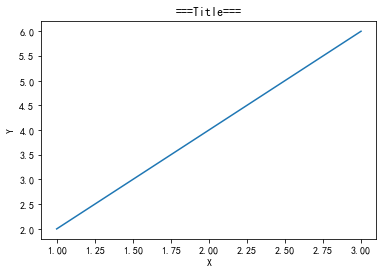

In [82]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 解决中文字体显示乱码问题
plt.rcParams['axes.unicode_minus'] = False
x = [1, 2, 3]
y = [2, 4, 6]
plt.plot(x, y)
plt.title('===Title===')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

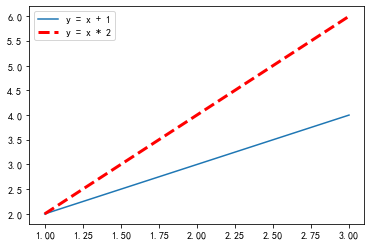

In [83]:
x1 = np.array([1, 2, 3])
y1 = x1 + 1
plt.plot(x1, y1, label='y = x + 1')

y2 = x1 * 2
plt.plot(x1, y2, color='red', linewidth=3, linestyle='--', label='y = x * 2')
plt.legend(loc='upper left')
plt.show()

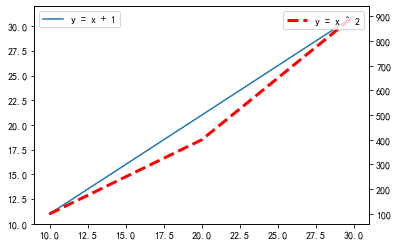

In [84]:
x1 = np.array([10, 20, 30])
y1 = x1 + 1
plt.plot(x1, y1, label='y = x + 1')
plt.legend(loc='upper left')
plt.twinx()

y2 = x1 ** 2
plt.plot(x1, y2, color='red', linewidth=3, linestyle='--', label='y = x ^ 2')
plt.legend(loc='upper right')
plt.show()

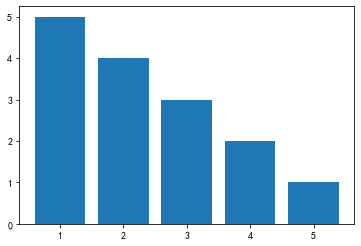

In [85]:
x = np.arange(1, 6)
y = np.arange(5, 0, -1)
plt.bar(x, y)
plt.show()

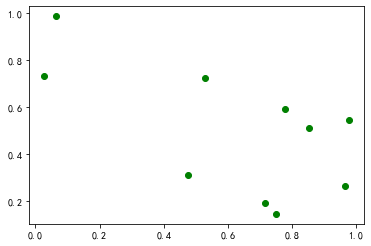

In [86]:
x = np.random.rand(10)
y = np.random.rand(10)
plt.scatter(x, y, color='green')
plt.show()

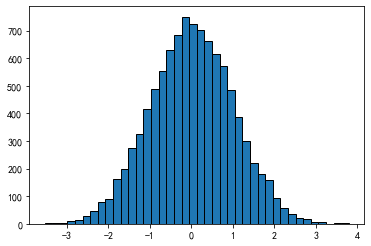

In [87]:
data = np.random.randn(10000)
plt.hist(data, bins=40, edgecolor='black', density=0)
plt.show()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

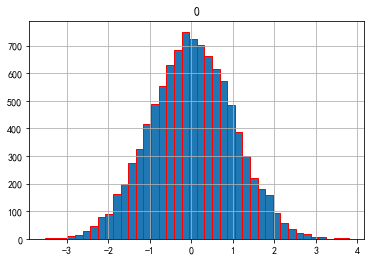

In [88]:
df = pd.DataFrame(data)
df.hist(bins=40, edgecolor='red')


<AxesSubplot:ylabel='Frequency'>

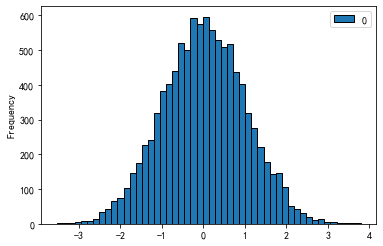

In [89]:
df.plot(kind='hist', bins=50, edgecolor='black')

<AxesSubplot:>

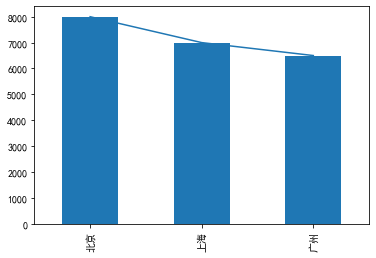

In [90]:
df = pd.DataFrame([[8000, 6000], [7000, 5000], [6500, 4000]], columns=['人均收入', '人均支出'], index=['北京', '上海', '广州'])
df['人均收入'].plot(kind='line')
df['人均收入'].plot(kind='bar')
# df['人均收入'].plot(kind='pie')


In [91]:
import matplotlib
# 查找字体路径
print(matplotlib.matplotlib_fname())
# 查找字体缓存路径
print(matplotlib.get_cachedir())

/env/python/venv-py3-common/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/chenzhian/.matplotlib


<AxesSubplot:ylabel='人均收入'>

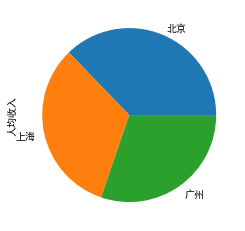

In [92]:
df['人均收入'].plot(kind='pie')


<AxesSubplot:>

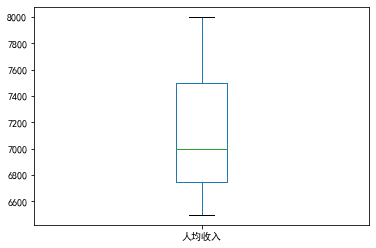

In [93]:
df['人均收入'].plot(kind='box')


<AxesSubplot:>

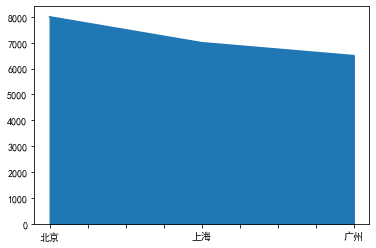

In [94]:
df['人均收入'].plot(kind='area')


In [95]:
# plt.xticks(rotation=45) # 设置x轴刻度的角度


(array([3., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

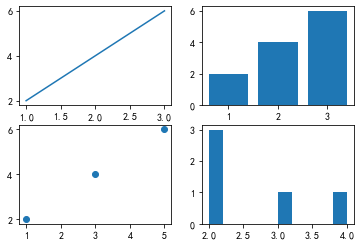

In [96]:
ax1 = plt.subplot(221)
plt.plot([1, 2, 3], [2, 4, 6])

ax2 = plt.subplot(222)
plt.bar([1, 2, 3], [2, 4, 6])

ax3 = plt.subplot(223)
plt.scatter([1, 3, 5], [2, 4, 6])

ax4 = plt.subplot(224)
plt.hist([2, 2, 2, 3, 4])

(array([3., 0., 0., 0., 0., 1., 0., 0., 0., 1.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <BarContainer object of 10 artists>)

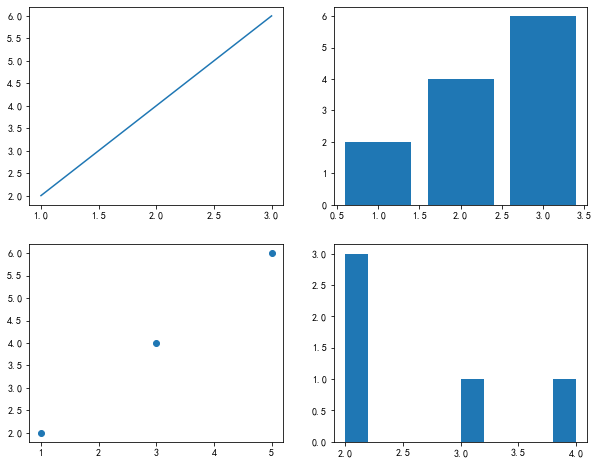

In [97]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
ax1, ax2, ax3, ax4 = axes.flatten()
ax1.plot([1, 2, 3], [2, 4, 6])
ax2.bar([1, 2, 3], [2, 4, 6])
ax3.scatter([1, 3, 5], [2, 4, 6])
ax4.hist([2, 2, 2, 3, 4])


In [98]:
import tushare as ts
api_token = 'fa7bf3ba3f93531ebab77af352bf9e8fdff95fff9f38bfa7e73874a8'
ts.set_token(api_token)

ts_pro = ts.pro_api()

In [99]:
df = ts_pro.trade_cal(exchange='', start_date='20210501', end_date='20210709', fields='exchange,cal_date,is_open,pretrade_date', is_open='0')
df

,exchange,cal_date,is_open,pretrade_date
0,SSE,20210501,0,20210430
1,SSE,20210502,0,20210430
2,SSE,20210503,0,20210430
3,SSE,20210504,0,20210430
4,SSE,20210505,0,20210430
5,SSE,20210508,0,20210507
6,SSE,20210509,0,20210507
7,SSE,20210515,0,20210514
8,SSE,20210516,0,20210514
9,SSE,20210522,0,20210521


In [100]:
df = ts_pro.daily(ts_code='000002.SZ', start_date='20190101', end_date='20210719')
df.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000002.SZ,20210719,23.88,23.89,23.27,23.48,23.95,-0.47,-1.9624,578645.57,1355079.894
1,000002.SZ,20210716,23.40,24.05,23.35,23.95,23.52,0.43,1.8282,643153.72,1534958.952
2,000002.SZ,20210715,23.21,23.73,23.01,23.52,23.21,0.31,1.3356,639812.43,1498254.942
3,000002.SZ,20210714,23.81,23.88,23.20,23.21,23.84,-0.63,-2.6426,748482.33,1753035.681
4,000002.SZ,20210713,23.84,24.14,23.73,23.84,23.82,0.02,0.0840,429413.08,1026027.218


In [101]:
from datetime import datetime
df.drop(columns=["ts_code"], inplace=True)
# df["trade_date"] = df["trade_date"].apply(lambda x: datetime.strptime(x, '%Y%m%d'))


<AxesSubplot:title={'center':'万科股价走势图'}>

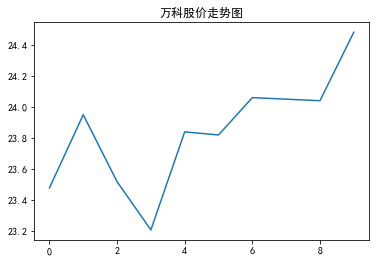

In [102]:
# plt.rcParams['font.sans-serif'] = ['SimHei']
df[0:10]['close'].plot(title="万科股价走势图")

In [103]:
import mpl_finance as mpf
import seaborn as sns
sns.set()

/env/python/venv-py3-common/lib/python3.7/site-packages/mpl_finance.py:22: DeprecationWarning: 



    Please use `mplfinance` instead (no hyphen, no underscore).

    To install: `pip install --upgrade mplfinance` 

   For more information, see: https://pypi.org/project/mplfinance/


  category=DeprecationWarning)


In [104]:
from matplotlib.pylab import date2num
# plt.rcParams['font.sans-serif'] = ['SimHei']
df2 = df[["trade_date", "open", "close", "high", "low", "vol"]].copy()
df2.rename(columns={'vol': 'volume'}, inplace=True)
df2['MA5'] = df2['close'].rolling(5).mean()
df2['MA10'] = df2['close'].rolling(10).mean()
df2['MA20'] = df2['close'].rolling(20).mean()

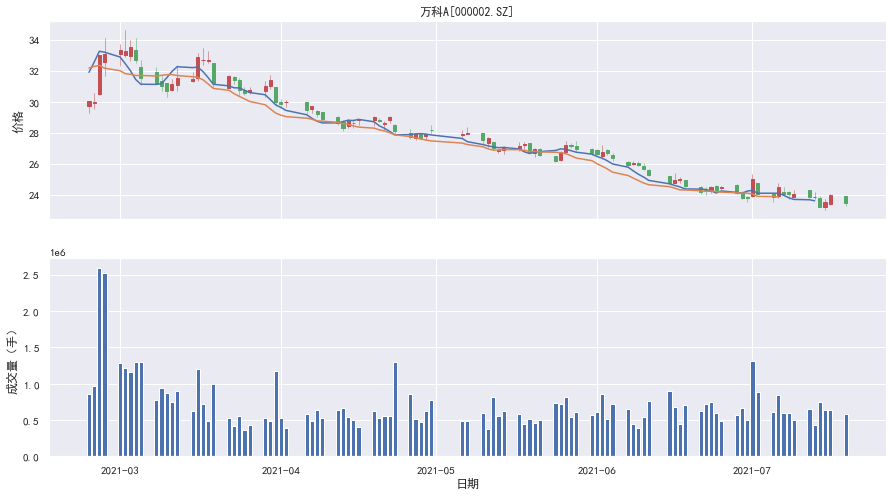

In [105]:
plt.rcParams['font.sans-serif'] = ['SimHei']
def date_to_num(dates):
    num_time = []
    for date in dates:
        date_time = datetime.strptime(date, "%Y%m%d")
        num_date = date2num(date_time)
        num_time.append(num_date)
    return num_time
df3 = df2[0:100].copy()
df_arr = df3.values
df_arr[:, 0] = date_to_num(df_arr[:, 0])
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15, 8))
ax1, ax2 = ax.flatten()
mpf.candlestick_ochl(ax1, df_arr, width=0.6, colorup='r', colordown='g', alpha=1.0)
ax1.plot(df_arr[:, 0], df3['MA5'])
ax1.plot(df_arr[:, 0], df3['MA10'])
ax1.grid(True)
ax1.set_title("万科A[000002.SZ]")
ax1.set_ylabel("价格")
ax1.xaxis_date()

ax2.bar(df_arr[:, 0], df_arr[:, 5])
ax2.set_xlabel("日期")
ax2.set_ylabel("成交量（手）")
ax2.grid(True)
ax2.xaxis_date()

['binance', 'blueskies', 'brasil', 'charles', 'checkers', 'classic', 'default', 'ibd', 'kenan', 'mike', 'nightclouds', 'sas', 'starsandstripes', 'yahoo']


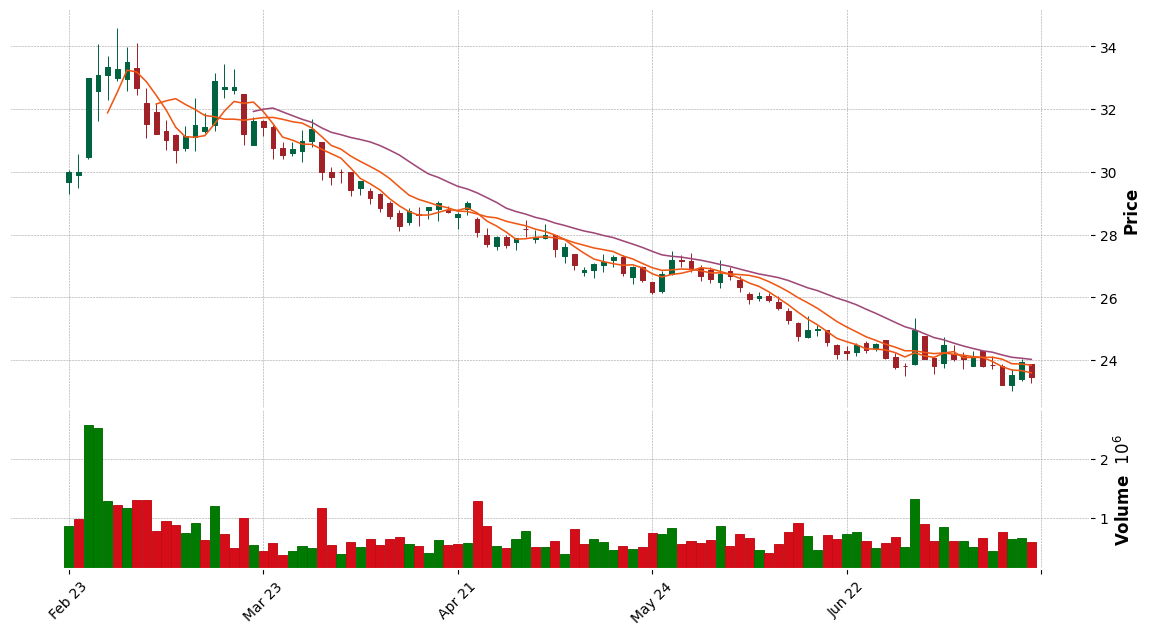

In [106]:
# 新mpl_finance升级包 mplfinance
import mplfinance as mpf_new
print(mpf_new.available_styles())
df4 = df3.copy()
df4['trade_date'] = pd.to_datetime(df4['trade_date'])
df4 = df4.set_index("trade_date")
df4.sort_index(inplace=True)
df4.index.name = 'date'
mpf_new.plot(df4, type='candle', mav=(5, 10, 20), volume=True, style='charles', figsize=(15, 8))

In [107]:
df2 = pd.DataFrame({'key1':np.arange(0,6), 'key2':np.arange(6,12)})
df2

,key1,key2
0,0,6
1,1,7
2,2,8
3,3,9
4,4,10
5,5,11


In [108]:
a = df2.quantile(q=0.75)
type(a)
a

key1    3.75
key2    9.75
Name: 0.75, dtype: float64

In [109]:
a['key1']


3.75

In [110]:
for app_en, app_cn in {'video': '视频', 'game': '游戏', 'browse': '浏览下载'}.items():
    print(app_en, app_cn)

video 视频
game 游戏
browse 浏览下载


In [111]:
arr = np.arange(1, 10).reshape(3, 3)
arr[:, 0]

array([1, 4, 7])

In [112]:
df_arr[:, 5]

array([578645.57, 643153.72, 639812.43, 748482.33, 429413.08, 645788.82,
       495907.81, 589155.23, 598540.74, 844134.79, 605991.53, 887290.38,
       1315383.53, 498882.63, 664404.65, 563018.94, 478206.96, 601455.02,
       743960.48, 724750.25, 624705.3, 700942.29, 440175.36, 676068.05,
       899155.01, 758537.38, 538007.76, 389918.24, 446764.94, 647452.8,
       714223.64, 505941.87, 853545.06, 609909.61, 566250.76, 602604.67,
       542034.68, 817029.3, 721058.09, 729212.36, 495770.12, 457498.55,
       515067.74, 437485.93, 582048.4, 624630.17, 550277.01, 810363.66,
       368855.46, 589667.32, 491289.28, 489975.5, 777133.54, 623862.45,
       476120.48, 511079.23, 859450.4, 1292568.62, 560026.06, 551734.25,
       529774.42, 619893.79, 395753.23, 503527.28, 544164.59, 669694.8,
       635227.77, 528595.8, 630400.64, 488440.53, 583845.7, 381349.62,
       525118.18, 1168413.03, 479099.5, 519288.28, 428771.15, 361694.51,
       559122.71, 422660.07, 521950.0, 989922.04, 482135.2

## 数据预处理
数据处理的步骤：

1. 异常值处理
2. 缺失值处理
3. 数据归一化
4. 数据标准化
5. 数据连续属性离散化

In [135]:
# 异常值分析
# （1）3σ原则：如果数据服从正态分布，异常值被定义为一组测定值中与平均值的偏差超过3倍的值 → p(|x - μ| > 3σ) ≤ 0.003
from scipy import stats

data = pd.Series(np.random.randn(10000) * 100)
u = data.mean()
std = data.std()
stats.kstest(data, 'norm', (u, std))

KstestResult(statistic=0.004987941507365201, pvalue=0.9636582238248779)

异常值共20


(-10.0, 10010.0)

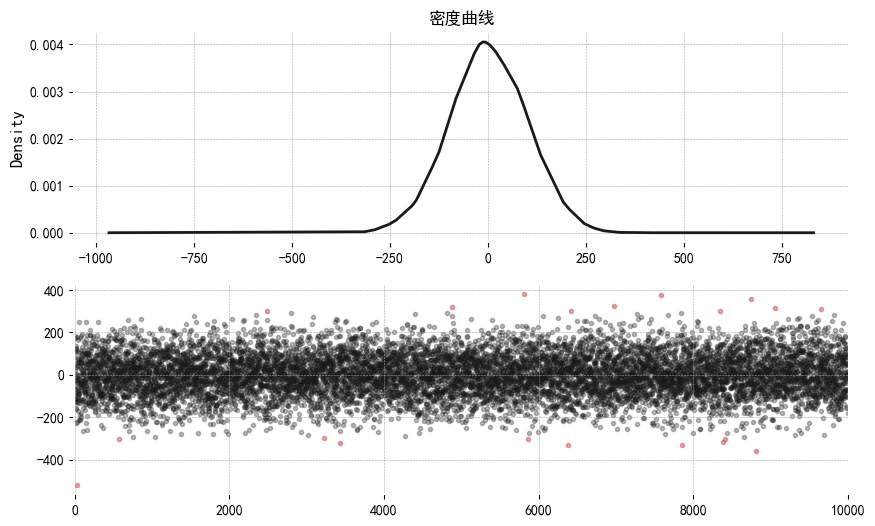

In [140]:
fig = plt.figure(figsize=(10, 6))
ax1 = fig.add_subplot(2, 1, 1)
data.plot(kind='kde', grid=True, style='-k', title='密度曲线')
ax2 = fig.add_subplot(2, 1, 2)
error = data[np.abs(data - u) > 3 * std]
data_c = data[np.abs(data - u) <= 3 * std]
print(f'异常值共{len(error)}')
plt.scatter(data_c.index, data_c, color='k', marker='.', alpha=0.3)
plt.scatter(error.index, error, color='r', marker='.', alpha=0.5)
plt.xlim([-10, 10010])

## 线性回归模型
y = ax + b
### 快速入门

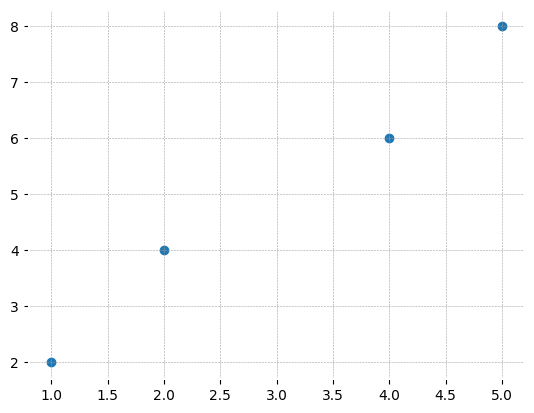

In [113]:
X = [[1], [2], [4], [5]]
Y = [2, 4, 6, 8]
plt.scatter(X, Y)



In [114]:
from sklearn.linear_model import LinearRegression
line_regression = LinearRegression()
line_regression.fit(X, Y)

LinearRegression()

In [115]:
y = line_regression.predict([[1.5]])
y

array([2.9])

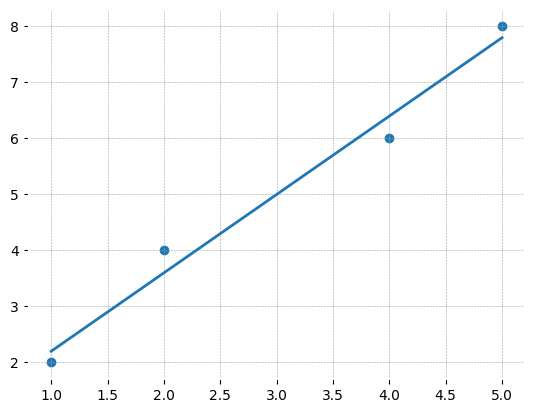

In [116]:
y = line_regression.predict([[1.5], [2.5], [4.5]])
plt.scatter(X, Y)
plt.plot(X, line_regression.predict(X))

In [117]:
a = round(line_regression.coef_[0], 2)
b = round(line_regression.intercept_, 2)
print(f'系数a={a}，截距b={b}')
print(f'拟合后的一元线程回归方程为：y = {a}x + {b}')

系数a=1.4，截距b=0.8
拟合后的一元线程回归方程为：y = 1.4x + 0.8


### 案例实战：不同行业工龄与薪水的线性回归模型

In [118]:
import os

cwd = os.getcwd()
df = pd.read_excel(cwd + "/dataset/temp/03/IT行业收入表.xlsx", engine='openpyxl')
df.head()
X = df[['工龄']]
Y = df['薪水']

系数a=2497.15，截距b=10143.13
拟合后的一元线程回归方程为：y = 2497.15x + 10143.13


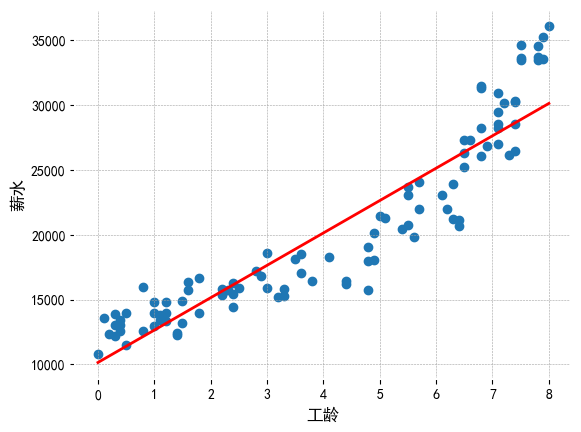

In [122]:
# from sklearn.linear_model import LinearRegression
plt.rcParams['font.sans-serif'] = ['SimHei']
regr = LinearRegression()
regr.fit(X, Y)

plt.scatter(X, Y)
plt.plot(X, regr.predict(X), color='red')
plt.xlabel('工龄')
plt.ylabel('薪水')

a = round(regr.coef_[0], 2)
b = round(regr.intercept_, 2)
print(f'系数a={a}，截距b={b}')
print(f'拟合后的一元线程回归方程为：y = {a}x + {b}')

### 线性回归模型评估2

In [123]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     578.5
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           6.69e-43
Time:                        21:45:51   Log-Likelihood:                -930.83
No. Observations:                 100   AIC:                             1866.
Df Residuals:                      98   BIC:                             1871.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.014e+04    507.633     19.981      0.000    9135.751    1.12e+04
工龄          2497.1513    103.823     24.052      0.000    2291.118    2703.185
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   0.555
Prob(Omnibus):                  0.867   Jarque-Bera (JB):                0.463
Skew:                           0.007   Prob(JB):                        0.793
Kurtosis:                       2.667   Cond. No.                         9.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

拟合后的一元二次回归方程为：y = 400.8x^2 + -743.68x + 13988.16


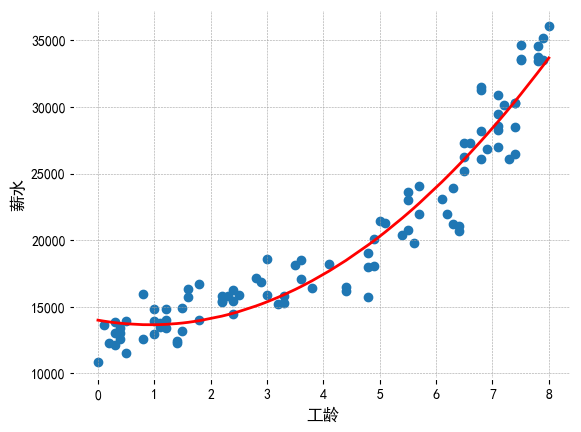

In [124]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_ = poly_reg.fit_transform(X)

regr = LinearRegression()
regr.fit(X_, Y)

plt.scatter(X, Y)
plt.plot(X, regr.predict(X_), color='red')
plt.xlabel('工龄')
plt.ylabel('薪水')

a = round(regr.coef_[2], 2)
b = round(regr.coef_[1], 2)
c = round(regr.intercept_, 2)
print(f'拟合后的一元二次回归方程为：y = {a}x^2 + {b}x + {c}')

### 线性回归模型评估2

In [125]:
X2 = sm.add_constant(X_)
est = sm.OLS(Y, X2).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     薪水   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     654.8
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           4.70e-57
Time:                        21:46:12   Log-Likelihood:                -893.72
No. Observations:                 100   AIC:                             1793.
Df Residuals:                      97   BIC:                             1801.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.399e+04    512.264     27.307      0.000     1.3e+04     1.5e+04
x1          -743.6808    321.809     -2.311      0.023   -1382.383    -104.979
x2           400.8040     38.790     10.333      0.000     323.816     477.792
==============================================================================
Omnibus:                        2.440   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.295   Jarque-Bera (JB):                2.083
Skew:                          -0.352   Prob(JB):                        0.353
Kurtosis:                       3.063   Cond. No.                         102.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 多元线性回归

In [126]:
df = pd.read_excel(cwd + "/dataset/temp/03/客户价值数据表.xlsx", engine='openpyxl')
df.head()

,客户价值,历史贷款金额,贷款次数,学历,月收入,性别
0,1150,6488,2,2,9567,1
1,1157,5194,4,2,10767,0
2,1163,7066,3,2,9317,0
3,983,3550,3,2,10517,0
4,1205,7847,3,3,11267,1


In [129]:
X = df.iloc[:, 1:]
Y = df.iloc[:, 0]

In [131]:
regr = LinearRegression()
regr.fit(X, Y)
print(f'各系数：{regr.coef_}')
print(f'常数项：{regr.intercept_}')

各系数：[5.71421731e-02 9.61723492e+01 1.13452022e+02 5.61326459e-02
 1.97874093e+00]
常数项：-208.42004079958383


In [132]:
X2 = sm.add_constant(X)
est = sm.OLS(Y, X2).fit()
est.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   客户价值   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     32.44
Date:                Tue, 03 Aug 2021   Prob (F-statistic):           6.41e-21
Time:                        22:09:52   Log-Likelihood:                -843.50
No. Observations:                 128   AIC:                             1699.
Df Residuals:                     122   BIC:                             1716.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -208.4200    163.810     -1.272      0.206    -532.699     115.859
历史贷款金额         0.0571      0.010      5.945      0.000       0.038       0.076
贷款次数          96.1723     25.962      3.704      0.000      44.778     147.567
学历           113.4520     37.909      2.993      0.003      38.406     188.498
月收入            0.0561      0.019      2.941      0.004       0.018       0.094
性别             1.9787     32.286      0.061      0.951     -61.934      65.891
==============================================================================
Omnibus:                        1.597   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.450   Jarque-Bera (JB):                1.538
Skew:                           0.264   Prob(JB):                        0.464
Kurtosis:                       2.900   Cond. No.                     1.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 逻辑回归模型

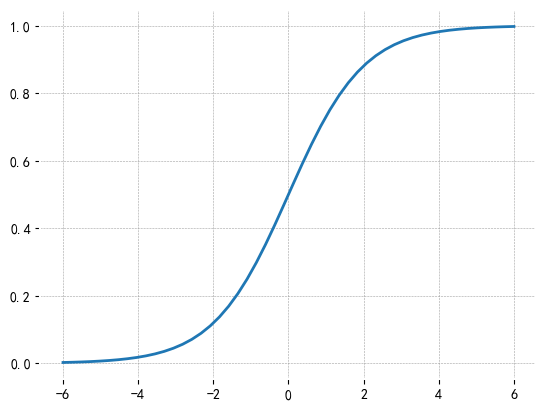

In [134]:
x = np.linspace(-6, 6)
y = 1.0 / (1.0 + np.exp(-x))
plt.plot(x, y)